# Exploratory Data Analysis

Doel: inzicht krijgen in de data, eventuele reparaties uitvoeren in Data Prep script

### In dit script:

1. Beschrijvingen
2. Frequentiediagrammen
3. Aandeel missings
4. Correlaties

Input: gemaakt in notebook Buurtscores Datamodel
- bm = buurten main
- wm = wijken main
- gm = gemeenten main

Inspiratie: 
https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce


### Declaraties

In [1]:
# importeren packages
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
#sns.set(color_codes=True)

# setten source path: later moet alle brondata naar datalake
source_path ="P:\\DATASCIENCE\\Aantrekkelijkheid buurten\\Resultaten\\"
# alle tussentijdse data voorlopig in dezelfde map op een schijf opslaan in
save_path = "P:\\DATASCIENCE\\Aantrekkelijkheid buurten\\Resultaten\\"

# jaar waarin gemeente op 1 januari een bevolking moet hebben om meegenomen te worden 
peiljaar = 2019

%matplotlib inline

### Ophalen buurten (alles gekoppeld), wm,wm,gm (buurt main, wijk main, gemeente main)

In [2]:
bv = pd.read_csv(source_path+'buurten.csv', encoding='utf-16')
bm = pd.read_csv(source_path+'bm.csv', encoding='utf-16')
wm = pd.read_csv(source_path+'wm.csv', encoding='utf-16')
gm = pd.read_csv(source_path+'gm.csv', encoding='utf-16')
print('buurten gemengd:', bv.info(), bv.head())
print('buurten: ', bm.info(), bm.head())
print('wijken: ', wm.info(), wm.head(20))
print('gemeenten: ', gm.info(), gm.head())

C:\Users\rondea\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13598 entries, 0 to 13597
Columns: 177 entries, buurtcode to mp
dtypes: float64(163), int64(6), object(8)
memory usage: 18.4+ MB
buurten gemengd: None    buurtcode                                    buurtnaam buurtcodeLetters  \
0      30000                           Appingedam-Centrum       BU00030000   
1      30001                              Appingedam-West       BU00030001   
2      30002                              Appingedam-Oost       BU00030002   
3      30007  Verspreide huizen Damsterdiep en Eemskanaal       BU00030007   
4      30008  Verspreide huizen ten zuiden van Eemskanaal       BU00030008   

   wijkcode wijknaam  gemeentecode gemeentenaam  buurtcode18  \
0       300  Wijk 00             3   Appingedam          NaN   
1       300  Wijk 00             3   Appingedam          NaN   
2       300  Wijk 00             3   Appingedam          NaN   
3       300  Wijk 00             3   Appingedam          NaN   
4       30

### Geef info over alle kolommen

In [3]:
# enkele statistieken
pd.set_option('display.max_columns', None)
print(bv.describe())

          buurtcode      wijkcode  gemeentecode   buurtcode18           inw  \
count  1.359800e+04   13598.00000  13598.000000  5.480000e+02  13598.000000   
mean   8.421485e+06   84214.75717    842.035152  5.756333e+06   1270.486101   
std    6.636623e+06   66366.23829    663.684799  5.385623e+06   1694.986503   
min    3.000000e+04     300.00000      3.000000  5.000000e+04      0.000000   
25%    3.072503e+06   30725.00000    307.000000  5.802018e+05    175.000000   
50%    5.991778e+06   59917.50000    599.000000  5.760008e+06    680.000000   
75%    1.674051e+07  167405.00000   1674.000000  7.721614e+06   1720.000000   
max    1.978200e+07  197820.00000   1978.000000  1.722021e+07  28750.000000   

             bevdh          oadh            hh         inw65          KL16  \
count  12962.00000  13533.000000  13598.000000  13598.000000  10473.000000   
mean    3090.79031   1184.796645    581.527063    243.752022      7.086699   
std     3967.93016   1497.105186    812.254782    342.

### Buurten main

In [4]:
# aantallen rijen en kolommen afdrukken
print('aantal rijen en kolommen: ', bm.shape)
# dubbelen tellen; mogen niet voorkomen
duplicate_rows_bm = bm[bm.duplicated()]
print('rijen en kolommen dubbele rijen: ', duplicate_rows_bm.shape)

aantal rijen en kolommen:  (13598, 163)
rijen en kolommen dubbele rijen:  (0, 163)


In [5]:
# aantal ontbrekende waarden per kolom afdrukken
print(bm.isnull().sum())

buurtcode             0
buurtnaam             0
buurtcodeLetters      0
wijkcode              0
wijknaam              0
                   ... 
ar30                 78
ar60                 78
door30               78
door60               78
banen               111
Length: 163, dtype: int64


In [6]:
# verder gaan met rijen waarvan alles gevuld is muv een paar niet relevante kolommen. DIT IS EEN belangrijke KEUZE!
bm.drop(['buurtcode18', 'buurtcodeLetters18'], axis=1, inplace=True)
bm = bm.dropna() 
bm.count()

buurtcode           905
buurtnaam           905
buurtcodeLetters    905
wijkcode            905
wijknaam            905
                   ... 
ar30                905
ar60                905
door30              905
door60              905
banen               905
Length: 161, dtype: int64

In [7]:
# dataframe maken met alleen numerieke variabelen
bmnum = bm.select_dtypes(include = ['float64', 'int64'])
bmnum.head()

,buurtcode,wijkcode,gemeentecode,inw,bevdh,oadh,hh,inw65,KL16,KL18,VKL1618,RLBRMTR16,RLBWON16,RLBBEV16,RLBVRZ16,RLBVEI16,RLBFYS16,RLBRMTR18,RLBWON18,RLBBEV18,RLBVRZ18,RLBVEI18,RLBFYS18,n_values-Beauty&Fitness,n_values-Events&Listings,n_values-Hobbies&Leisure,n_values-PerformingArts,n_values-RealEstate,n_values-Restaurants,n_values-Shopping,mean-Beauty&Fitness,mean-Events&Listings,mean-Hobbies&Leisure,mean-PerformingArts,mean-RealEstate,mean-Restaurants,mean-Shopping,std-Beauty&Fitness,std-Events&Listings,std-Hobbies&Leisure,std-PerformingArts,std-RealEstate,std-Restaurants,std-Shopping,sum-Beauty&Fitness,sum-Events&Listings,sum-Hobbies&Leisure,sum-PerformingArts,sum-RealEstate,sum-Restaurants,sum-Shopping,nunique-Beauty&Fitness,nunique-Events&Listings,nunique-Hobbies&Leisure,nunique-PerformingArts,nunique-RealEstate,nunique-Restaurants,nunique-Shopping,iqr-Beauty&Fitness,iqr-Events&Listings,iqr-Hobbies&Leisure,iqr-PerformingArts,iqr-RealEstate,iqr-Restaurants,iqr-Shopping,total_na-Beauty&Fitness,total_na-Events&Listings,total_na-Hobbies&Leisure,total_na-PerformingArts,total_na-RealEstate,total_na-Restaurants,total_na-Shopping,pct_emtpy-Beauty&Fitness,pct_emtpy-Events&Listings,pct_emtpy-Hobbies&Leisure,pct_emtpy-PerformingArts,pct_emtpy-RealEstate,pct_emtpy-Restaurants,pct_emtpy-Shopping,2019_mean_change-Beauty&Fitness,2019_mean_change-Events&Listings,2019_mean_change-Hobbies&Leisure,2019_mean_change-PerformingArts,2019_mean_change-RealEstate,2019_mean_change-Restaurants,2019_mean_change-Shopping,alpha-Beauty&Fitness,alpha-Events&Listings,alpha-Hobbies&Leisure,alpha-PerformingArts,alpha-RealEstate,alpha-Restaurants,alpha-Shopping,beta-Beauty&Fitness,beta-Events&Listings,beta-Hobbies&Leisure,beta-PerformingArts,beta-RealEstate,beta-Restaurants,beta-Shopping,prophet_next_year-Beauty&Fitness,prophet_next_year-Events&Listings,prophet_next_year-Hobbies&Leisure,prophet_next_year-PerformingArts,prophet_next_year-RealEstate,prophet_next_year-Restaurants,prophet_next_year-Shopping,AfstandSupermarkt,AantalLevensm3,AfstandHuisarts,AantalCafe3,AantalRest3,AantalKinderopvang1,AfstandZwembad,AantalMusea10,AantalPodiumk10,AantalBios5,hh19inkLaag,hh30inkLaag,hh19inkMidden,hh30inkMidden,hh19inkHoog,hh30inkHoog,aandeelMH19,wvtotaal,wvkoop,wvhuursoc,wvhuurov,wv<1945,wv1945-1970,wv1970-1980,wv1980-1990,wv1990-2000,wv2000-2010,wv>=2010,aand<1945,aand1945-1970,aand1970-1980,aand1980-1990,aand1990-2000,aand2000-2010,aand>=2010,aandkoop,aandhuursoc,aandhuurov,auto30,auto60,ov30,ov60,fiets,ar30,ar60,door30,door60,banen
62,140100,1401,14,1520,6955.0,4165.0,1045,230,8.0,9.0,5.0,0.198132,0.085597,0.057087,0.146213,-0.036226,-0.054540,0.265745,0.083137,0.050661,0.163371,0.023081,-0.054506,72.0,72.0,72.0,72.0,72.0,72.0,72.0,11.111111,12.763889,40.125000,10.416667,11.305556,7.305556,14.694444,29.729085,32.052990,21.338280,29.747648,22.978029,24.497565,20.827013,800.0,919.0,2889.0,750.0,814.0,526.0,1058.0,10.0,8.0,39.0,8.0,12.0,6.0,15.0,0.00,0.00,25.25,0.00,0.00,0.00,34.0,63.0,62.0,4.0,64.0,57.0,66.0,45.0,0.875000,0.861111,0.055556,0.888889,0.791667,0.916667,0.625000,0.000000,0.538869,0.899895,1.038360,0.698603,1.061164,0.000000,3.174603,5.523810,8.206349,26.537302,-0.317460,-1.587302,15.253968,-0.714286,-0.942857,-1.921429,0.299524,0.238095,1.190476,1.149524,-10.096626,1.167688,30.806998,15.349130,17.527347,6.786527,21.655454,0.8,116.2,0.3,127.0,248.5,2.7,3.1,5.0,6.0,3.0,730.0,830.0,100.0,110.0,150.0,160.0,0.255102,550.0,325.0,75.0,150.0,75.0,0.0,0.0,75.0,225.0,150.0,0.0,0.136364,0.000000,0.000000,0.136364,0.409091,0.272727,0.000000,0.590909,0.136364,0.272727,330742.000000,814385.00,103840.000000,276487.00,152297.500000,46.500000,34.000000,96.000000,95.000000,195626.500000
63,140101,1401,14,5180,13066.0,4078.0,3775,490,7.0,8.0,4.0,0.084113,0.084673,0.081261,0.182440,-0.105295,-0.158965,0.129716,0.082804,0.076248,0.199839,-0.065175,-0.164000,72.0,72.0,72.0,72.0,72.0,72.0,72.0,38.152778,53.152778,56.708333,28.833333,43.361111,33.555556,50.569444,18.924356,17.7


 boxplot voor: inw
AxesSubplot(0.125,0.125;0.775x0.755)


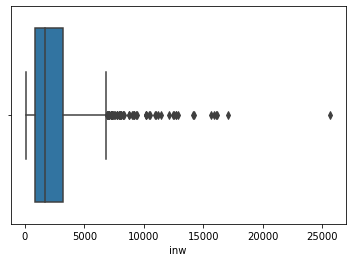


 boxplot voor: bevdh
AxesSubplot(0.125,0.125;0.775x0.755)


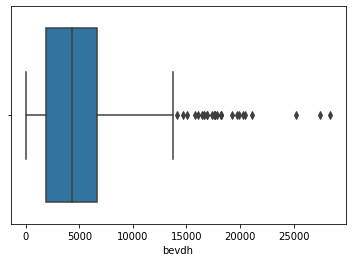


 boxplot voor: oadh
AxesSubplot(0.125,0.125;0.775x0.755)


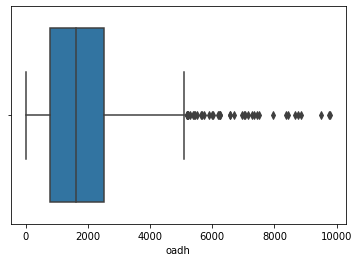


 boxplot voor: hh
AxesSubplot(0.125,0.125;0.775x0.755)


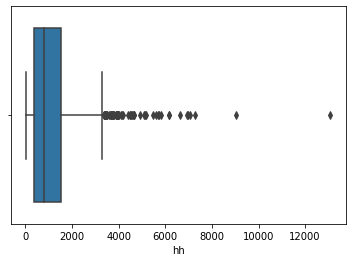


 boxplot voor: inw65
AxesSubplot(0.125,0.125;0.775x0.755)


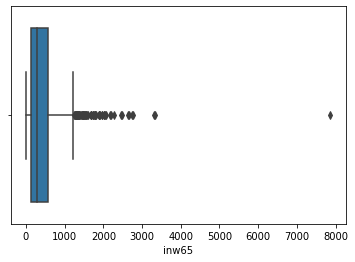


 boxplot voor: KL16
AxesSubplot(0.125,0.125;0.775x0.755)


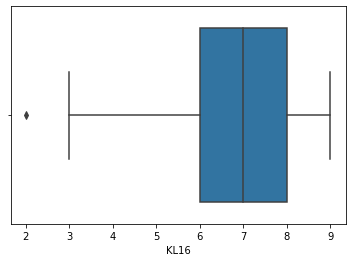


 boxplot voor: KL18
AxesSubplot(0.125,0.125;0.775x0.755)


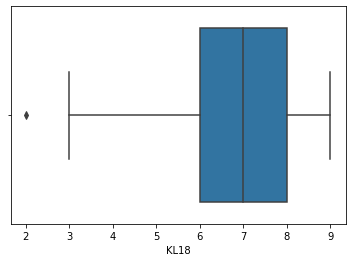


 boxplot voor: VKL1618
AxesSubplot(0.125,0.125;0.775x0.755)


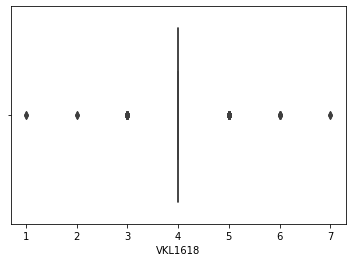


 boxplot voor: RLBRMTR16
AxesSubplot(0.125,0.125;0.775x0.755)


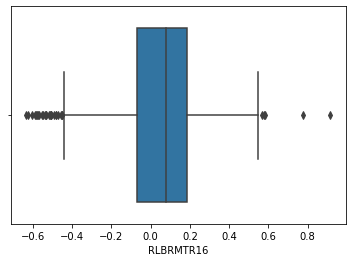


 boxplot voor: RLBWON16
AxesSubplot(0.125,0.125;0.775x0.755)


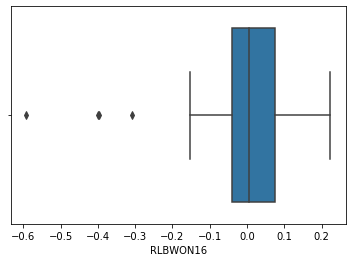


 boxplot voor: RLBBEV16
AxesSubplot(0.125,0.125;0.775x0.755)


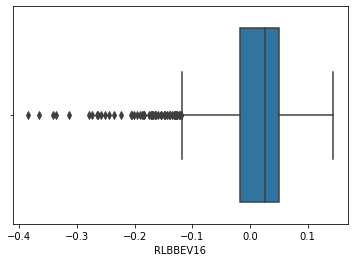


 boxplot voor: RLBVRZ16
AxesSubplot(0.125,0.125;0.775x0.755)


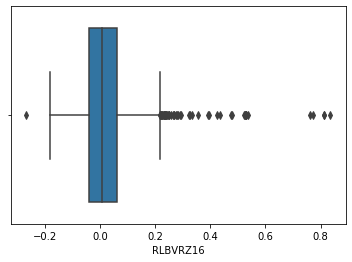


 boxplot voor: RLBVEI16
AxesSubplot(0.125,0.125;0.775x0.755)


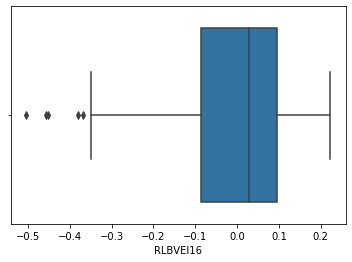


 boxplot voor: RLBFYS16
AxesSubplot(0.125,0.125;0.775x0.755)


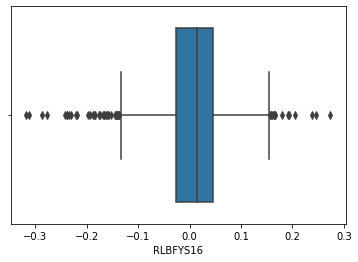


 boxplot voor: RLBRMTR18
AxesSubplot(0.125,0.125;0.775x0.755)


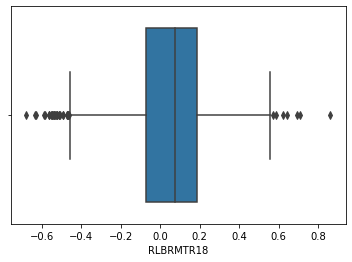


 boxplot voor: RLBWON18
AxesSubplot(0.125,0.125;0.775x0.755)


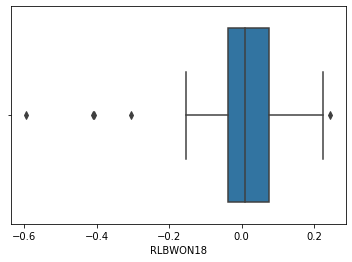


 boxplot voor: RLBBEV18
AxesSubplot(0.125,0.125;0.775x0.755)


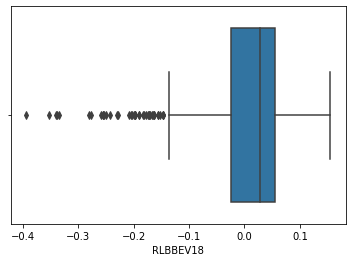


 boxplot voor: RLBVRZ18
AxesSubplot(0.125,0.125;0.775x0.755)


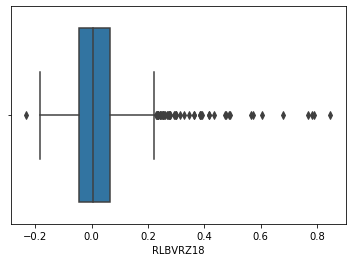


 boxplot voor: RLBVEI18
AxesSubplot(0.125,0.125;0.775x0.755)


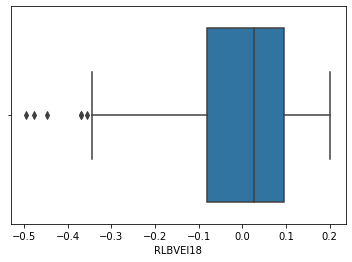


 boxplot voor: RLBFYS18
AxesSubplot(0.125,0.125;0.775x0.755)


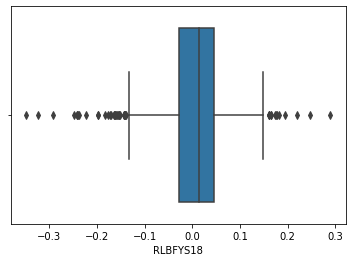


 boxplot voor: AfstandSupermarkt
AxesSubplot(0.125,0.125;0.775x0.755)


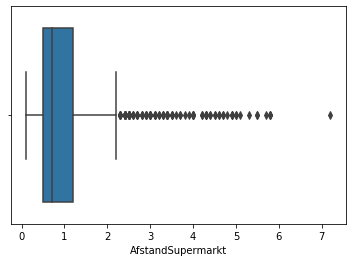


 boxplot voor: AantalLevensm3
AxesSubplot(0.125,0.125;0.775x0.755)


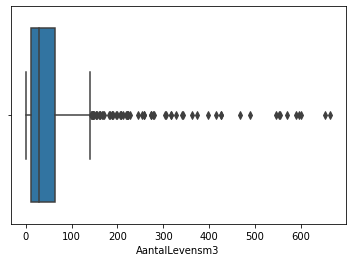


 boxplot voor: AfstandHuisarts
AxesSubplot(0.125,0.125;0.775x0.755)


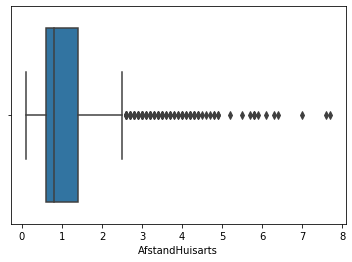


 boxplot voor: AantalCafe3
AxesSubplot(0.125,0.125;0.775x0.755)


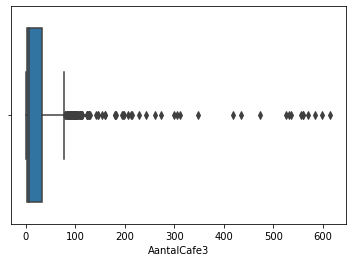


 boxplot voor: AantalRest3
AxesSubplot(0.125,0.125;0.775x0.755)


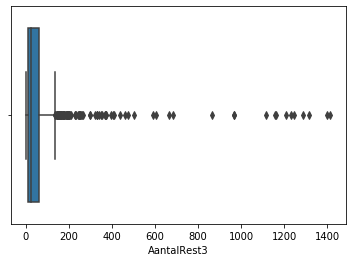


 boxplot voor: AantalKinderopvang1
AxesSubplot(0.125,0.125;0.775x0.755)


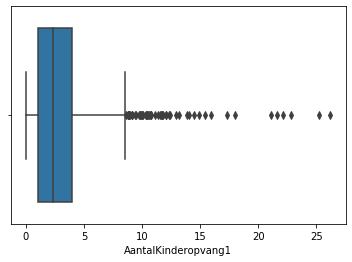


 boxplot voor: AfstandZwembad
AxesSubplot(0.125,0.125;0.775x0.755)


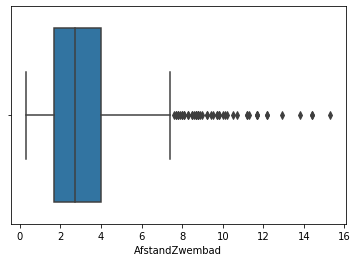


 boxplot voor: AantalMusea10
AxesSubplot(0.125,0.125;0.775x0.755)


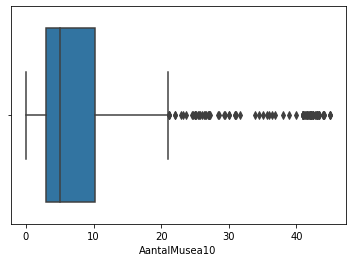


 boxplot voor: AantalPodiumk10
AxesSubplot(0.125,0.125;0.775x0.755)


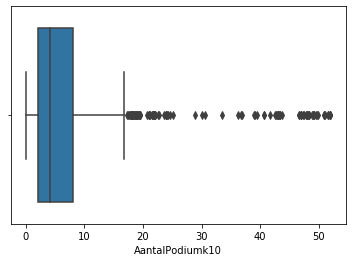


 boxplot voor: AantalBios5
AxesSubplot(0.125,0.125;0.775x0.755)


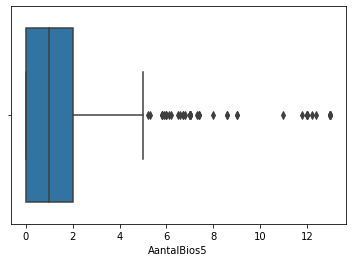


 boxplot voor: hh19inkLaag
AxesSubplot(0.125,0.125;0.775x0.755)


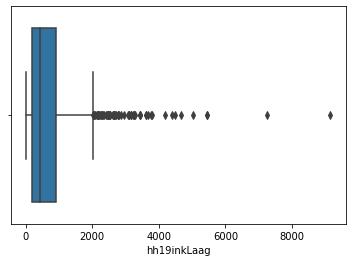


 boxplot voor: hh30inkLaag
AxesSubplot(0.125,0.125;0.775x0.755)


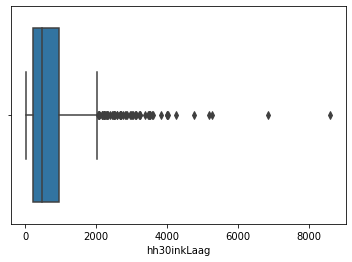


 boxplot voor: hh19inkMidden
AxesSubplot(0.125,0.125;0.775x0.755)


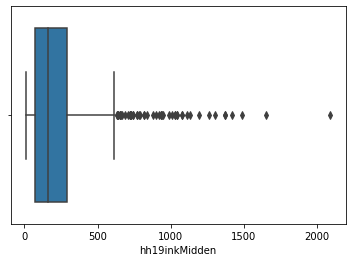


 boxplot voor: hh30inkMidden
AxesSubplot(0.125,0.125;0.775x0.755)


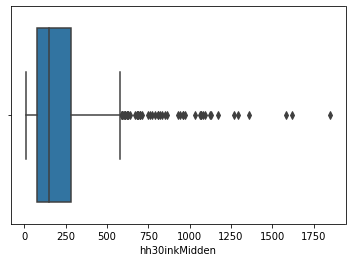


 boxplot voor: hh19inkHoog
AxesSubplot(0.125,0.125;0.775x0.755)


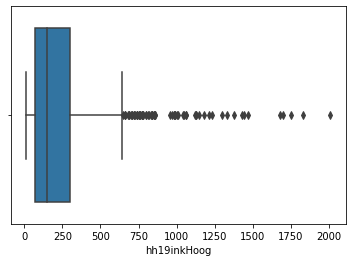


 boxplot voor: hh30inkHoog
AxesSubplot(0.125,0.125;0.775x0.755)


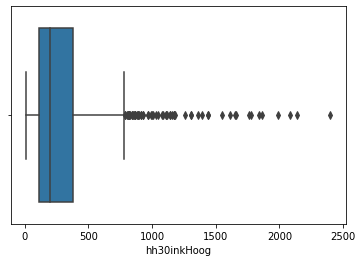


 boxplot voor: aandeelMH19
AxesSubplot(0.125,0.125;0.775x0.755)


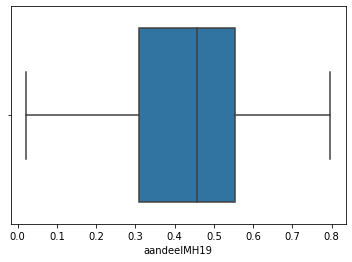


 boxplot voor: auto30
AxesSubplot(0.125,0.125;0.775x0.755)


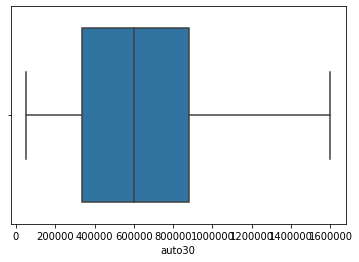


 boxplot voor: auto60
AxesSubplot(0.125,0.125;0.775x0.755)


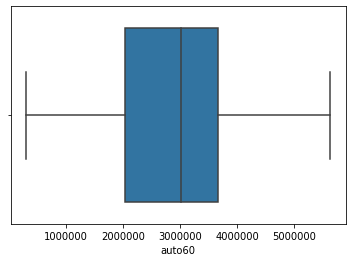


 boxplot voor: ov30
AxesSubplot(0.125,0.125;0.775x0.755)


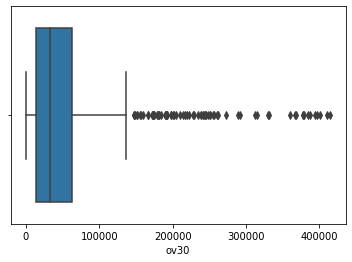


 boxplot voor: ov60
AxesSubplot(0.125,0.125;0.775x0.755)


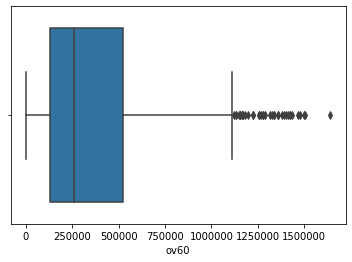


 boxplot voor: fiets
AxesSubplot(0.125,0.125;0.775x0.755)


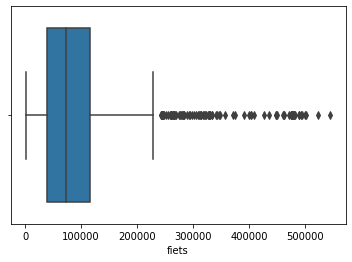


 boxplot voor: ar30
AxesSubplot(0.125,0.125;0.775x0.755)


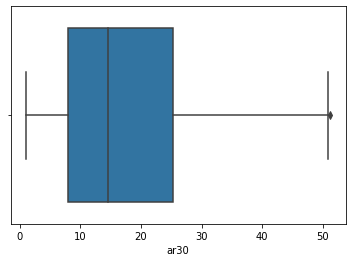


 boxplot voor: ar60
AxesSubplot(0.125,0.125;0.775x0.755)


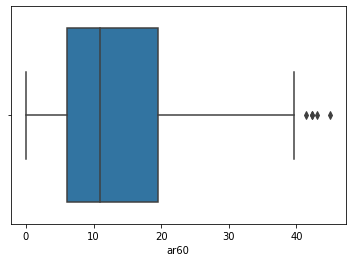


 boxplot voor: door30
AxesSubplot(0.125,0.125;0.775x0.755)


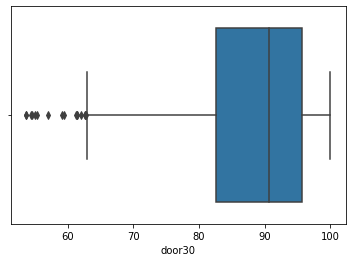


 boxplot voor: door60
AxesSubplot(0.125,0.125;0.775x0.755)


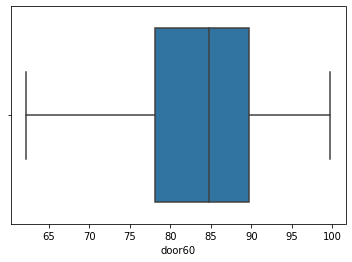

In [8]:
# boxplots evt voor uitschieters opsporen
for var in ['inw', 'bevdh', 'oadh', 'hh', 'inw65', 'KL16', 'KL18', 'VKL1618', 'RLBRMTR16','RLBWON16','RLBBEV16','RLBVRZ16',
            'RLBVEI16','RLBFYS16','RLBRMTR18','RLBWON18','RLBBEV18','RLBVRZ18','RLBVEI18','RLBFYS18','AfstandSupermarkt',
            'AantalLevensm3','AfstandHuisarts','AantalCafe3','AantalRest3','AantalKinderopvang1','AfstandZwembad',
            'AantalMusea10','AantalPodiumk10','AantalBios5','hh19inkLaag','hh30inkLaag','hh19inkMidden','hh30inkMidden',
            'hh19inkHoog','hh30inkHoog','aandeelMH19','auto30','auto60','ov30','ov60','fiets','ar30','ar60','door30','door60']:
    print('\n boxplot voor: ' +  var)
    print(sns.boxplot(x=bm[var]))
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B6A66D748>,
      dtype=object)

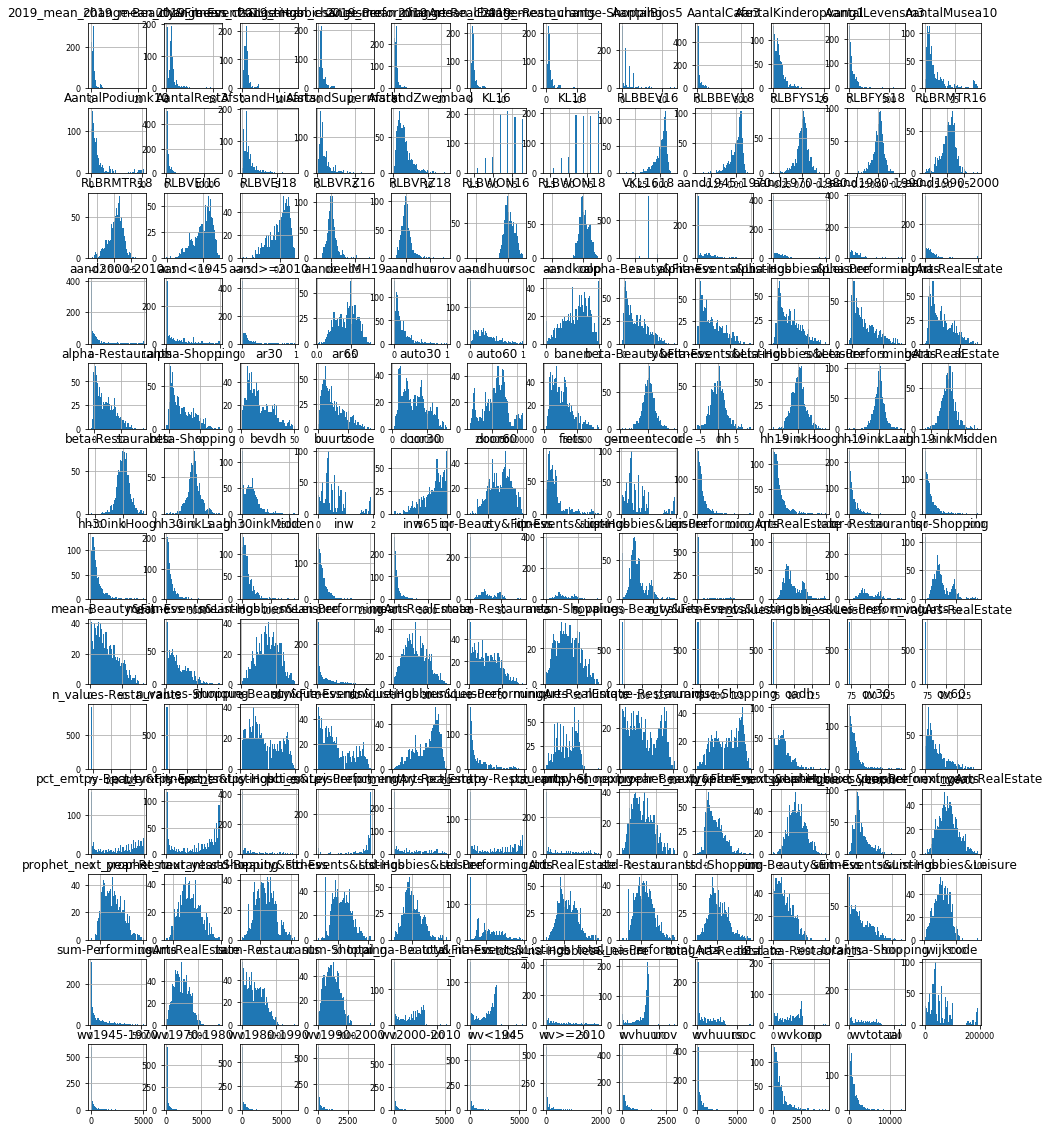

In [9]:
# histogrammen voor alle numerieke kolommen
bmnum.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [10]:
# selecteer numerieke kolommen van wijken
wmnum = wm.select_dtypes(include = ['float64', 'int64'])
wmnum.head()

,wijkcode,gemeentecode,wox,woxdelta1jr,woxdelta5jr,woxww,woxm2,woxGem,woxdelta1jrGem,woxdelta5jrGem,woxwwGem,woxm2Gem,woxdelta5jrWGabs,woxdelta5jrWGrel,woxm2WG
0,300,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# creëer buurt wijk main numeriek
bwmnum = pd.merge(bmnum, wm, how= 'left', on ='wijkcode')
bwmnum.head()

,buurtcode,wijkcode,gemeentecode_x,inw,bevdh,oadh,hh,inw65,KL16,KL18,VKL1618,RLBRMTR16,RLBWON16,RLBBEV16,RLBVRZ16,RLBVEI16,RLBFYS16,RLBRMTR18,RLBWON18,RLBBEV18,RLBVRZ18,RLBVEI18,RLBFYS18,n_values-Beauty&Fitness,n_values-Events&Listings,n_values-Hobbies&Leisure,n_values-PerformingArts,n_values-RealEstate,n_values-Restaurants,n_values-Shopping,mean-Beauty&Fitness,mean-Events&Listings,mean-Hobbies&Leisure,mean-PerformingArts,mean-RealEstate,mean-Restaurants,mean-Shopping,std-Beauty&Fitness,std-Events&Listings,std-Hobbies&Leisure,std-PerformingArts,std-RealEstate,std-Restaurants,std-Shopping,sum-Beauty&Fitness,sum-Events&Listings,sum-Hobbies&Leisure,sum-PerformingArts,sum-RealEstate,sum-Restaurants,sum-Shopping,nunique-Beauty&Fitness,nunique-Events&Listings,nunique-Hobbies&Leisure,nunique-PerformingArts,nunique-RealEstate,nunique-Restaurants,nunique-Shopping,iqr-Beauty&Fitness,iqr-Events&Listings,iqr-Hobbies&Leisure,iqr-PerformingArts,iqr-RealEstate,iqr-Restaurants,iqr-Shopping,total_na-Beauty&Fitness,total_na-Events&Listings,total_na-Hobbies&Leisure,total_na-PerformingArts,total_na-RealEstate,total_na-Restaurants,total_na-Shopping,pct_emtpy-Beauty&Fitness,pct_emtpy-Events&Listings,pct_emtpy-Hobbies&Leisure,pct_emtpy-PerformingArts,pct_emtpy-RealEstate,pct_emtpy-Restaurants,pct_emtpy-Shopping,2019_mean_change-Beauty&Fitness,2019_mean_change-Events&Listings,2019_mean_change-Hobbies&Leisure,2019_mean_change-PerformingArts,2019_mean_change-RealEstate,2019_mean_change-Restaurants,2019_mean_change-Shopping,alpha-Beauty&Fitness,alpha-Events&Listings,alpha-Hobbies&Leisure,alpha-PerformingArts,alpha-RealEstate,alpha-Restaurants,alpha-Shopping,beta-Beauty&Fitness,beta-Events&Listings,beta-Hobbies&Leisure,beta-PerformingArts,beta-RealEstate,beta-Restaurants,beta-Shopping,prophet_next_year-Beauty&Fitness,prophet_next_year-Events&Listings,prophet_next_year-Hobbies&Leisure,prophet_next_year-PerformingArts,prophet_next_year-RealEstate,prophet_next_year-Restaurants,prophet_next_year-Shopping,AfstandSupermarkt,AantalLevensm3,AfstandHuisarts,AantalCafe3,AantalRest3,AantalKinderopvang1,AfstandZwembad,AantalMusea10,AantalPodiumk10,AantalBios5,hh19inkLaag,hh30inkLaag,hh19inkMidden,hh30inkMidden,hh19inkHoog,hh30inkHoog,aandeelMH19,wvtotaal,wvkoop,wvhuursoc,wvhuurov,wv<1945,wv1945-1970,wv1970-1980,wv1980-1990,wv1990-2000,wv2000-2010,wv>=2010,aand<1945,aand1945-1970,aand1970-1980,aand1980-1990,aand1990-2000,aand2000-2010,aand>=2010,aandkoop,aandhuursoc,aandhuurov,auto30,auto60,ov30,ov60,fiets,ar30,ar60,door30,door60,banen,wijknaam,gemeentecode_y,gemeentenaam,wox,woxdelta1jr,woxdelta5jr,woxww,woxm2,woxGem,woxdelta1jrGem,woxdelta5jrGem,woxwwGem,woxm2Gem,woxdelta5jrWGabs,woxdelta5jrWGrel,woxm2WG
0,140100,1401,14,1520,6955.0,4165.0,1045,230,8.0,9.0,5.0,0.198132,0.085597,0.057087,0.146213,-0.036226,-0.054540,0.265745,0.083137,0.050661,0.163371,0.023081,-0.054506,72.0,72.0,72.0,72.0,72.0,72.0,72.0,11.111111,12.763889,40.125000,10.416667,11.305556,7.305556,14.694444,29.729085,32.052990,21.338280,29.747648,22.978029,24.497565,20.827013,800.0,919.0,2889.0,750.0,814.0,526.0,1058.0,10.0,8.0,39.0,8.0,12.0,6.0,15.0,0.00,0.00,25.25,0.00,0.00,0.00,34.0,63.0,62.0,4.0,64.0,57.0,66.0,45.0,0.875000,0.861111,0.055556,0.888889,0.791667,0.916667,0.625000,0.000000,0.538869,0.899895,1.038360,0.698603,1.061164,0.000000,3.174603,5.523810,8.206349,26.537302,-0.317460,-1.587302,15.253968,-0.714286,-0.942857,-1.921429,0.299524,0.238095,1.190476,1.149524,-10.096626,1.167688,30.806998,15.349130,17.527347,6.786527,21.655454,0.8,116.2,0.3,127.0,248.5,2.7,3.1,5.0,6.0,3.0,730.0,830.0,100.0,110.0,150.0,160.0,0.255102,550.0,325.0,75.0,150.0,75.0,0.0,0.0,75.0,225.0,150.0,0.0,0.136364,0.000000,0.000000,0.136364,0.409091,0.272727,0.000000,0.590909,0.136364,0.272727,330742.000000,814385.00,103840.000000,276487.00,152297.500000,46.500000,34.000000,96.000000,95.000000,195626.500000,Oud-Zuid,14,Groningen,374.0,7.8,39.2,218000.0,2600.0,350.0,8.4,34.7,229000.0,2400.0,4.5,1.129683,1.083333
1,140101,

In [18]:
# de minder relevante kolommen bij voorbaat al laten vervallen voor de heatmap anders wordt die te onoverzichtelijk
# alle kolommen bm: 'inw', 'bevdh', 'oadh', 'hh', 'inw65', 'KL16', 'KL18', 'VKL1618', 'RLBRMTR16','RLBWON16','RLBBEV16','RLBVRZ16',
            #'RLBVEI16','RLBFYS16','RLBRMTR18','RLBWON18','RLBBEV18','RLBVRZ18','RLBVEI18','RLBFYS18','AfstandSupermarkt',
            #'AantalLevensm3','AfstandHuisarts','AantalCafe3','AantalRest3','AantalKinderopvang1','AfstandZwembad',
            #'AantalMusea10','AantalPodiumk10','AantalBios5','hh19inkLaag','hh30inkLaag','hh19inkMidden','hh30inkMidden',
            #'hh19inkHoog','hh30inkHoog','aandeelMH19','auto30','auto60','ov30','ov60','fiets','ar30','ar60','door30','door60']:
#dropcolumns = ['buurtcode', 'wijkcode', 'gemeentecode_x','gemeentecode_y','inw', 'bevdh', 'hh', 'inw65', 
#               'KL16', 'VKL1618', 'RLBRMTR16','RLBWON16','RLBBEV16','RLBVRZ16', 'RLBVEI16','RLBFYS16',
#               'wvtotaal', 'wv<1945', 'wv1945-1970', 'wv1970-1980', 'wv1980-1990', 'wv1990-2000', 'wv2000-2010', 'wv>=2010',               'hh19inkLaag','hh30inkLaag','hh19inkMidden','hh30inkMidden','hh19inkHoog','hh30inkHoog', 
#               'auto60','ov60', 'ar30','ar60','door30', 'door60']


dropcolumns = ['buurtcode','inw', 'bevdh', 'oadh', 'hh', 'inw65', 'KL16', 'KL18', 'VKL1618',
                'RLBRMTR18', 'RLBWON18', 'RLBBEV18', 'RLBVRZ18', 'RLBVEI18', 'RLBFYS18', 
                'AfstandSupermarkt', 'AantalLevensm3', 'AfstandHuisarts', 'AantalCafe3','AantalRest3', 'AantalKinderopvang1', 
                'AfstandZwembad', 'AantalMusea10', 'AantalPodiumk10', 'AantalBios5', 
                'hh19inkLaag', 'hh30inkLaag', 'hh19inkMidden', 'hh30inkMidden', 'hh19inkHoog', 'hh30inkHoog', 
                'aandeelMH19', 'auto30', 'auto60', 'ov30', 'ov60', 'fiets', 
                'wox', 'woxdelta1jr', 'woxdelta5jr', 'woxww', 'woxm2', 
                'woxGem', 'woxdelta1jrGem', 'woxdelta5jrGem', 'woxwwGem', 'woxm2Gem', 'woxdelta5jrWGabs', 'woxdelta5jrWGrel', 
                'woxm2WG','banen', 'buurtcode', 'wijkcode', 'gemeentecode_x','gemeentecode_y','inw', 'bevdh', 'hh', 'inw65', 
               'KL16', 'VKL1618', 'RLBRMTR16','RLBWON16','RLBBEV16','RLBVRZ16', 'RLBVEI16','RLBFYS16',
               'wvtotaal', 'wv<1945', 'wv1945-1970', 'wv1970-1980', 'wv1980-1990', 'wv1990-2000', 'wv2000-2010', 'wv>=2010',               'hh19inkLaag','hh30inkLaag','hh19inkMidden','hh30inkMidden','hh19inkHoog','hh30inkHoog', 
               'auto60','ov60', 'ar30','ar60','door30', 'door60', 'aandkoop', 'aandhuursoc', 'aandhuurov', 'wijknaam', 'gemeentenaam']
              
dropcolumns = list(set(dropcolumns))              
              


bwmnum_small = bwmnum.drop(dropcolumns, axis=1)

In [19]:
bwmnum_small.head()

,n_values-Beauty&Fitness,n_values-Events&Listings,n_values-Hobbies&Leisure,n_values-PerformingArts,n_values-RealEstate,n_values-Restaurants,n_values-Shopping,mean-Beauty&Fitness,mean-Events&Listings,mean-Hobbies&Leisure,mean-PerformingArts,mean-RealEstate,mean-Restaurants,mean-Shopping,std-Beauty&Fitness,std-Events&Listings,std-Hobbies&Leisure,std-PerformingArts,std-RealEstate,std-Restaurants,std-Shopping,sum-Beauty&Fitness,sum-Events&Listings,sum-Hobbies&Leisure,sum-PerformingArts,sum-RealEstate,sum-Restaurants,sum-Shopping,nunique-Beauty&Fitness,nunique-Events&Listings,nunique-Hobbies&Leisure,nunique-PerformingArts,nunique-RealEstate,nunique-Restaurants,nunique-Shopping,iqr-Beauty&Fitness,iqr-Events&Listings,iqr-Hobbies&Leisure,iqr-PerformingArts,iqr-RealEstate,iqr-Restaurants,iqr-Shopping,total_na-Beauty&Fitness,total_na-Events&Listings,total_na-Hobbies&Leisure,total_na-PerformingArts,total_na-RealEstate,total_na-Restaurants,total_na-Shopping,pct_emtpy-Beauty&Fitness,pct_emtpy-Events&Listings,pct_emtpy-Hobbies&Leisure,pct_emtpy-PerformingArts,pct_emtpy-RealEstate,pct_emtpy-Restaurants,pct_emtpy-Shopping,2019_mean_change-Beauty&Fitness,2019_mean_change-Events&Listings,2019_mean_change-Hobbies&Leisure,2019_mean_change-PerformingArts,2019_mean_change-RealEstate,2019_mean_change-Restaurants,2019_mean_change-Shopping,alpha-Beauty&Fitness,alpha-Events&Listings,alpha-Hobbies&Leisure,alpha-PerformingArts,alpha-RealEstate,alpha-Restaurants,alpha-Shopping,beta-Beauty&Fitness,beta-Events&Listings,beta-Hobbies&Leisure,beta-PerformingArts,beta-RealEstate,beta-Restaurants,beta-Shopping,prophet_next_year-Beauty&Fitness,prophet_next_year-Events&Listings,prophet_next_year-Hobbies&Leisure,prophet_next_year-PerformingArts,prophet_next_year-RealEstate,prophet_next_year-Restaurants,prophet_next_year-Shopping,wvkoop,wvhuursoc,wvhuurov,aand<1945,aand1945-1970,aand1970-1980,aand1980-1990,aand1990-2000,aand2000-2010,aand>=2010
0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,11.111111,12.763889,40.125000,10.416667,11.305556,7.305556,14.694444,29.729085,32.052990,21.338280,29.747648,22.978029,24.497565,20.827013,800.0,919.0,2889.0,750.0,814.0,526.0,1058.0,10.0,8.0,39.0,8.0,12.0,6.0,15.0,0.00,0.00,25.25,0.00,0.00,0.00,34.0,63.0,62.0,4.0,64.0,57.0,66.0,45.0,0.875000,0.861111,0.055556,0.888889,0.791667,0.916667,0.625000,0.000000,0.538869,0.899895,1.038360,0.698603,1.061164,0.000000,3.174603,5.523810,8.206349,26.537302,-0.317460,-1.587302,15.253968,-0.714286,-0.942857,-1.921429,0.299524,0.238095,1.190476,1.149524,-10.096626,1.167688,30.806998,15.349130,17.527347,6.786527,21.655454,325.0,75.0,150.0,0.136364,0.000000,0.000000,0.136364,0.409091,0.272727,0.000000
1,72.0,72.0,72.0,72.0,72.0,72.0,72.0,38.152778,53.152778,56.708333,28.833333,43.361111,33.555556,50.569444,18.924356,17.791959,17.298895,16.601374,21.617224,23.998761,15.529006,2747.0,3827.0,4083.0,2076.0,3122.0,2416.0,3641.0,41.0,45.0,47.0,29.0,42.0,26.0,43.0,21.25,20.25,23.25,14.25,28.00,23.00,20.5,3.0,0.0,0.0,6.0,5.0,18.0,0.0,0.041667,0.000000,0.000000,0.083333,0.069444,0.250000,0.000000,1.064220,1.052255,0.346795,0.482353,0.939119,0.879972,0.882964,14.341667,38.788095,10.382937,13.938492,16.923016,49.562698,6.430556,3.418333,1.878095,-2.405952,1.757381,-2.158095,3.543810,1.281667,37.135741,49.453678,71.420512,26.425591,44.608252,31.960963,46.601777,850.0,825.0,1100.0,0.651786,0.017857,0.107143,0.107143,0.071429,0.035714,0.000000
2,72.0,72.0,72.0,72.0,72.0,72.0,72.0,7.319444,3.513889,1.388889,1.388889,14.319444,5.319444,14.430556,20.220493,17.124230,11.785113,11.785113,26.494127,22.098261,32.638363,527.0,253.0,100.0,100.0,1031.0,383.0,1039.0,8.0,4.0,2.0,2.0,13.0,5.0,11.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,63.0,69.0,71.0,71.0,55.0,68.0,60.0,0.875000,0.958333,0.986111,0.986111,0.763889,0.944444,0.833333,0.000000,0.739510,1.682717,0.000000,0.000000,0.000000,0.000000,28.198016,45.557143,1.835714,31.638889,37.587302,11.449206,23.316270,4.330238,-1.636190,2.429048,3.230000,-2.120476,-1.041905,0.034048,-2.487875,9.

,n_values-Beauty&Fitness,n_values-Events&Listings,n_values-Hobbies&Leisure,n_values-PerformingArts,n_values-RealEstate,n_values-Restaurants,n_values-Shopping,mean-Beauty&Fitness,mean-Events&Listings,mean-Hobbies&Leisure,mean-PerformingArts,mean-RealEstate,mean-Restaurants,mean-Shopping,std-Beauty&Fitness,std-Events&Listings,std-Hobbies&Leisure,std-PerformingArts,std-RealEstate,std-Restaurants,std-Shopping,sum-Beauty&Fitness,sum-Events&Listings,sum-Hobbies&Leisure,sum-PerformingArts,sum-RealEstate,sum-Restaurants,sum-Shopping,nunique-Beauty&Fitness,nunique-Events&Listings,nunique-Hobbies&Leisure,nunique-PerformingArts,nunique-RealEstate,nunique-Restaurants,nunique-Shopping,iqr-Beauty&Fitness,iqr-Events&Listings,iqr-Hobbies&Leisure,iqr-PerformingArts,iqr-RealEstate,iqr-Restaurants,iqr-Shopping,total_na-Beauty&Fitness,total_na-Events&Listings,total_na-Hobbies&Leisure,total_na-PerformingArts,total_na-RealEstate,total_na-Restaurants,total_na-Shopping,pct_emtpy-Beauty&Fitness,pct_emtpy-Events&Listings,pct_emtpy-Hobbies&Leisure,pct_emtpy-PerformingArts,pct_emtpy-RealEstate,pct_emtpy-Restaurants,pct_emtpy-Shopping,2019_mean_change-Beauty&Fitness,2019_mean_change-Events&Listings,2019_mean_change-Hobbies&Leisure,2019_mean_change-PerformingArts,2019_mean_change-RealEstate,2019_mean_change-Restaurants,2019_mean_change-Shopping,alpha-Beauty&Fitness,alpha-Events&Listings,alpha-Hobbies&Leisure,alpha-PerformingArts,alpha-RealEstate,alpha-Restaurants,alpha-Shopping,beta-Beauty&Fitness,beta-Events&Listings,beta-Hobbies&Leisure,beta-PerformingArts,beta-RealEstate,beta-Restaurants,beta-Shopping,prophet_next_year-Beauty&Fitness,prophet_next_year-Events&Listings,prophet_next_year-Hobbies&Leisure,prophet_next_year-PerformingArts,prophet_next_year-RealEstate,prophet_next_year-Restaurants,prophet_next_year-Shopping,wvkoop,wvhuursoc,wvhuurov,aand<1945,aand1945-1970,aand1970-1980,aand1980-1990,aand1990-2000,aand2000-2010,aand>=2010
n_values-Beauty&Fitness,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001219,-0.008944,0.010318,-0.014333,-0.016608,-0.009303,-0.011611,0.004816,0.021142,-0.027254,0.015294,-0.031832,0.012930,-0.007547,0.096828,0.069007,0.178665,0.031371,0.104323,0.082996,0.111092,0.006968,-0.002930,0.021122,0.001382,0.037111,0.001537,-0.005292,-0.012135,-0.000665,-0.041219,0.009750,-0.025153,-0.012385,-0.016052,0.107601,0.120664,0.001062,0.223120,0.085897,0.120349,0.089194,0.008785,0.009154,-0.023324,0.021635,0.010530,0.019553,0.015490,-0.023431,-0.027812,-0.014773,0.041236,-0.049914,-0.026726,0.059804,-0.031678,-0.000364,0.009857,-0.057211,-0.036611,-0.015057,-0.023341,-0.018541,0.018887,-0.017554,0.045352,0.030108,-0.004304,0.009597,0.030721,0.017112,-0.002428,-0.001484,0.005176,-0.004102,-0.021941,-0.026403,-0.013388,-0.025747,-0.031115,0.045134,0.029643,-0.024140,-0.004928,0.002785,-0.015989
n_values-Events&Listings,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001219,-0.008944,0.010318,-0.014333,-0.016608,-0.009303,-0.011611,0.004816,0.021142,-0.027254,0.015294,-0.031832,0.012930,-0.007547,0.096828,0.069007,0.178665,0.031371,0.104323,0.082996,0.111092,0.006968,-0.002930,0.021122,0.001382,0.037111,0.001537,-0.005292,-0.012135,-0.000665,-0.041219,0.009750,-0.025153,-0.012385,-0.016052,0.107601,0.120664,0.001062,0.223120,0.085897,0.120349,0.089194,0.008785,0.009154,-0.023324,0.021635,0.010530,0.019553,0.015490,-0.023431,-0.027812,-0.014773,0.041236,-0.049914,-0.026726,0.059804,-0.031678,-0.000364,0.009857,-0.057211,-0.036611,-0.015057,-0.023341,-0.018541,0.018887,-0.017554,0.045352,0.030108,-0.004304,0.009597,0.030721,0.017112,-0.002428,-0.001484,0.005176,-0.004102,-0.021941,-0.026403,-0.013388,-0.025747,-0.031115,0.045134,0.029643,-0.024140,-0.004928,0.002785,-0.015989
n_values-Hobbies&Leisure,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001219,-0.008944,0.010318,-0.014333,-0.016608,-0.009303,-0.011611,0.004816,0.021142,-0.027254,0.015294,-0.031832,0.012930,-0.007547,0.096828,0.

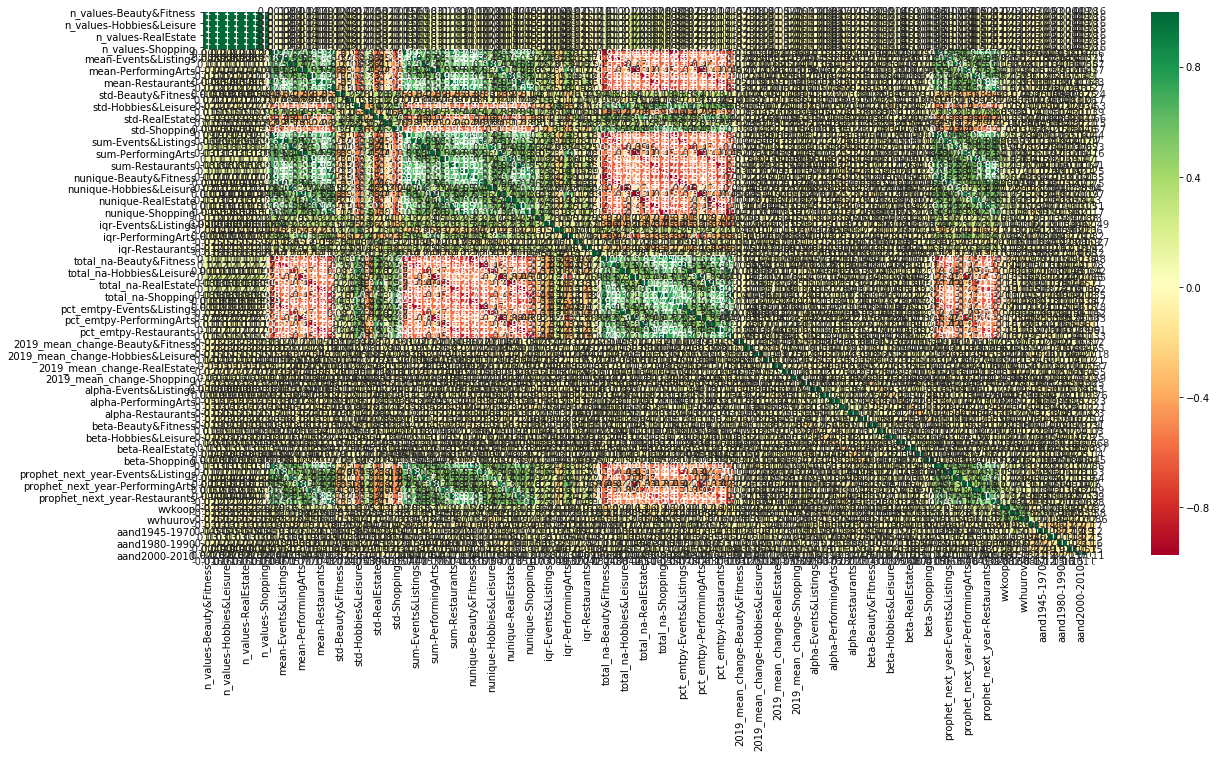

In [20]:
# afdrukken heatmap met kleuren van rood tot groen
plt.figure(figsize=(20,10))
c= bwmnum_small.corr()
sns.heatmap(c,cmap='RdYlGn', annot=True)
c